# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# Step 1: Reading & Understanding Data

In [102]:
# import necessary libs/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1.1: Read the data

In [44]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
bike_sharing.shape

(730, 16)

In [46]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [47]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 1.2 Visualize the relationship between target variable viz. cnt with other features

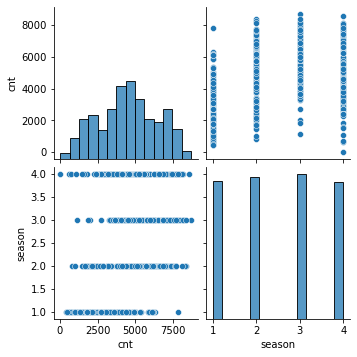

In [48]:
sns.pairplot(bike_sharing[['cnt', 'season']])

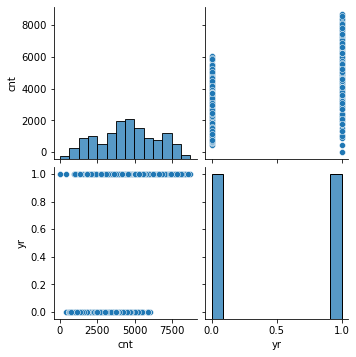

In [49]:
sns.pairplot(bike_sharing[['cnt', 'yr']])

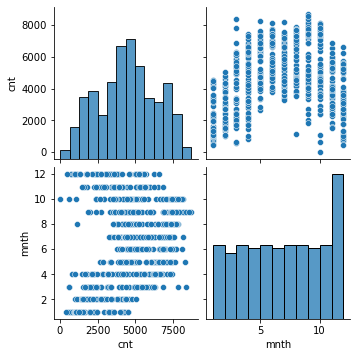

In [50]:
sns.pairplot(bike_sharing[['cnt', 'mnth']])

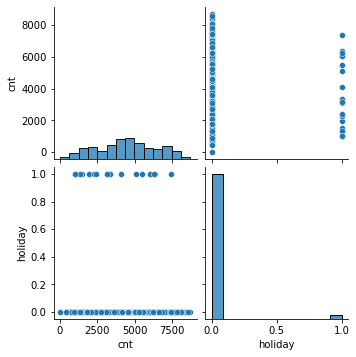

In [51]:
sns.pairplot(bike_sharing[['cnt', 'holiday']])

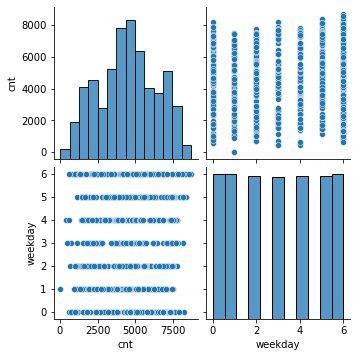

In [52]:
sns.pairplot(bike_sharing[['cnt', 'weekday']])

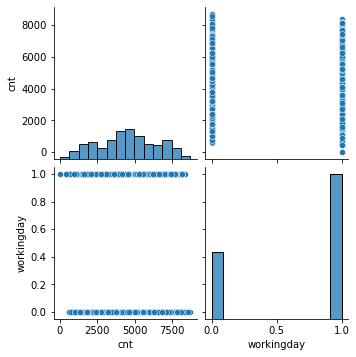

In [53]:
sns.pairplot(bike_sharing[['cnt', 'workingday']])

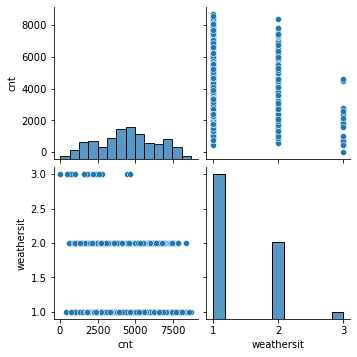

In [54]:
sns.pairplot(bike_sharing[['cnt', 'weathersit']])

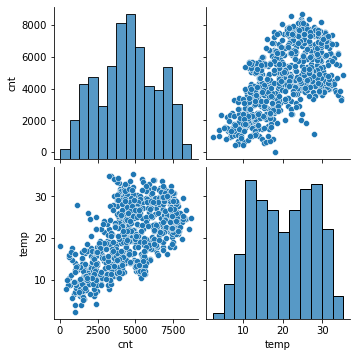

In [55]:
sns.pairplot(bike_sharing[['cnt', 'temp']])

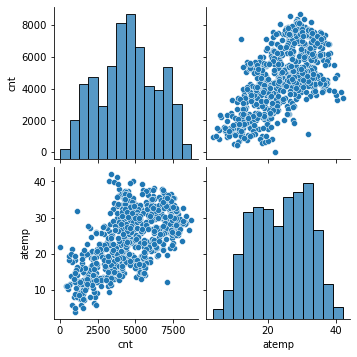

In [56]:
sns.pairplot(bike_sharing[['cnt', 'atemp']])

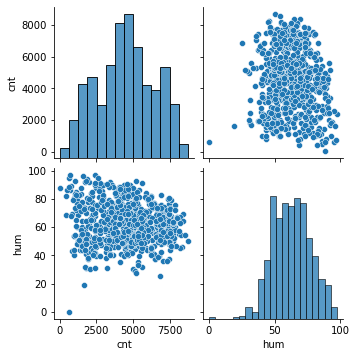

In [57]:
sns.pairplot(bike_sharing[['cnt', 'hum']])

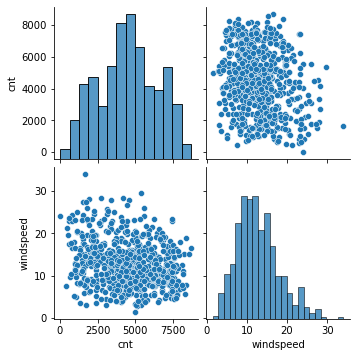

In [58]:
sns.pairplot(bike_sharing[['cnt', 'windspeed']])

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

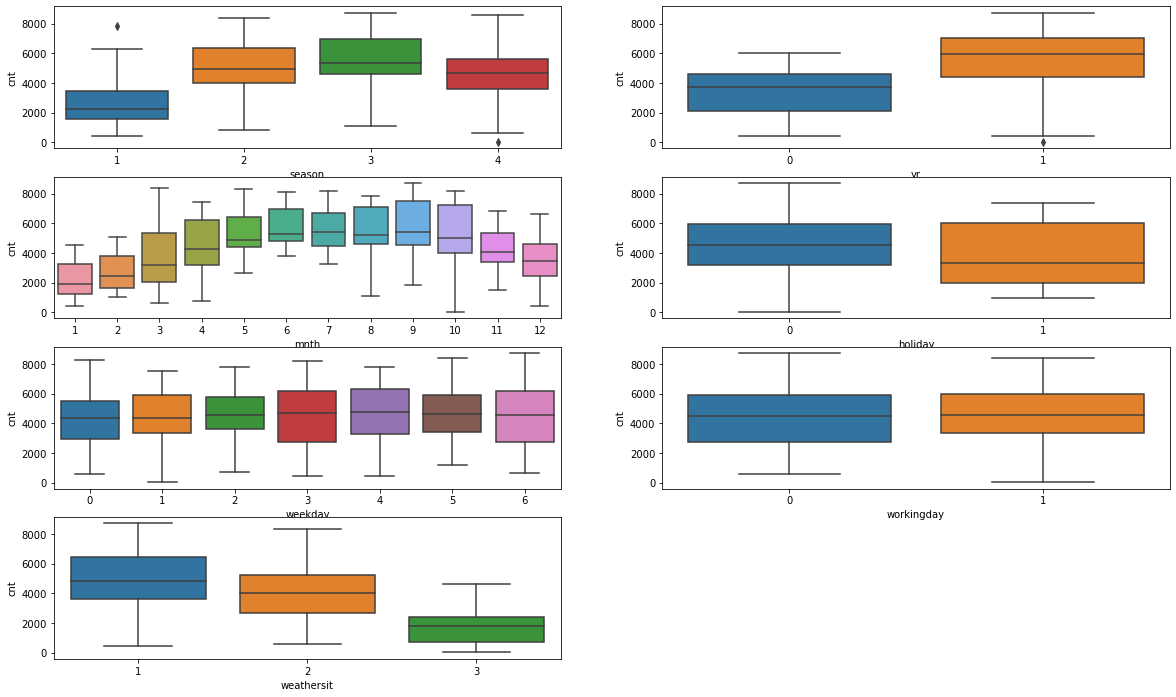

In [59]:
#let's use box-plot for understanding variation of cnt against Categorical variables 
# viz. season, yr, mnth, holiday, weekday, workingday, weathersit
plt.figure(figsize=(20, 12))

# create multiple sub-plots
plt.subplot(4, 2, 1)
sns.boxplot(x='season', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 2)
sns.boxplot(x='yr', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing)

## Summary from Data Visualization between cnt & others:
* season: there is variation of cnt with each season
* yr: cnt seems to have linear relationship with year
* mnth: there is variation of cnt against month of the year
* holiday: there is high cnt for not holiday
* weekday: median is mostly same; though there is variation of range
* workingday: same median and there is no much variation in cnt against working day or not
* weathersit: median is not same and there is variation of cnt against weather situation
* temp/atemp: both has linear relationship with cnt
* hum & windspeed: there seems to be no linear relationship of hum & windspeed with cnt

# Step 2: Data Preparation

## Let's drop non relevant features from the datasets
* instant, dteday, casual & registered

In [60]:
bike_sharing_01 = bike_sharing.drop(['instant','dteday', 'mnth', 'weekday','casual', 'registered'], axis=1)
bike_sharing_01.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Create Dummy Variables for Categorical variables:

### 01: Handling of season

In [61]:
# let's create dummy variable for season
season = pd.get_dummies(bike_sharing_01['season'], drop_first=True)
season.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [62]:
#let's concat season to bike_sharing_01
bike_sharing_01 = pd.concat([bike_sharing_01, season], axis=1)
bike_sharing_01.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2,3,4
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [63]:
#give readable name to dummay variable column 2, 3, 4 as summer, fall & winter respectively
bike_sharing_01.rename(columns={2: 'summer', 3: 'fall', 4:'winter'}, inplace = True)
#let's drop column 'season' from the dataframe
bike_sharing_01.drop('season', axis=1, inplace=True)
bike_sharing_01.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


## 02: Handling of Categorical variable 'weathersit'

In [64]:
# let's create dummy variable for season
weathersit = pd.get_dummies(bike_sharing_01['weathersit'])
weathersit.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


### Conclusion: since data does not have any rows with value 4, let's avoid dropping the first

In [65]:
#let's concat weathersit to bike_sharing_01
bike_sharing_01 = pd.concat([bike_sharing_01, weathersit], axis=1)
bike_sharing_01.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,1,2,3
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [66]:
#give readable name to dummay variable related to weathersit
bike_sharing_01.rename(columns={1: 'Clear_weather', 2: 'Mist_Weather', 3:'Light_Snow_Weather'}, inplace = True)
bike_sharing_01.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [67]:
#let's drop column 'mnth' from the dataframe
bike_sharing_01.drop('weathersit', axis=1, inplace=True)
bike_sharing_01.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


# Step 3: Splitting the Data into training & testing sets

In [68]:
#let's create split in a way where rows are consistent everytime
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_01, train_size=0.7, test_size=0.3, random_state=100)

## Let's apply scaling to numerical variables to make them in same range

In [69]:
scaler = MinMaxScaler()

In [70]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,1,0


<AxesSubplot:>

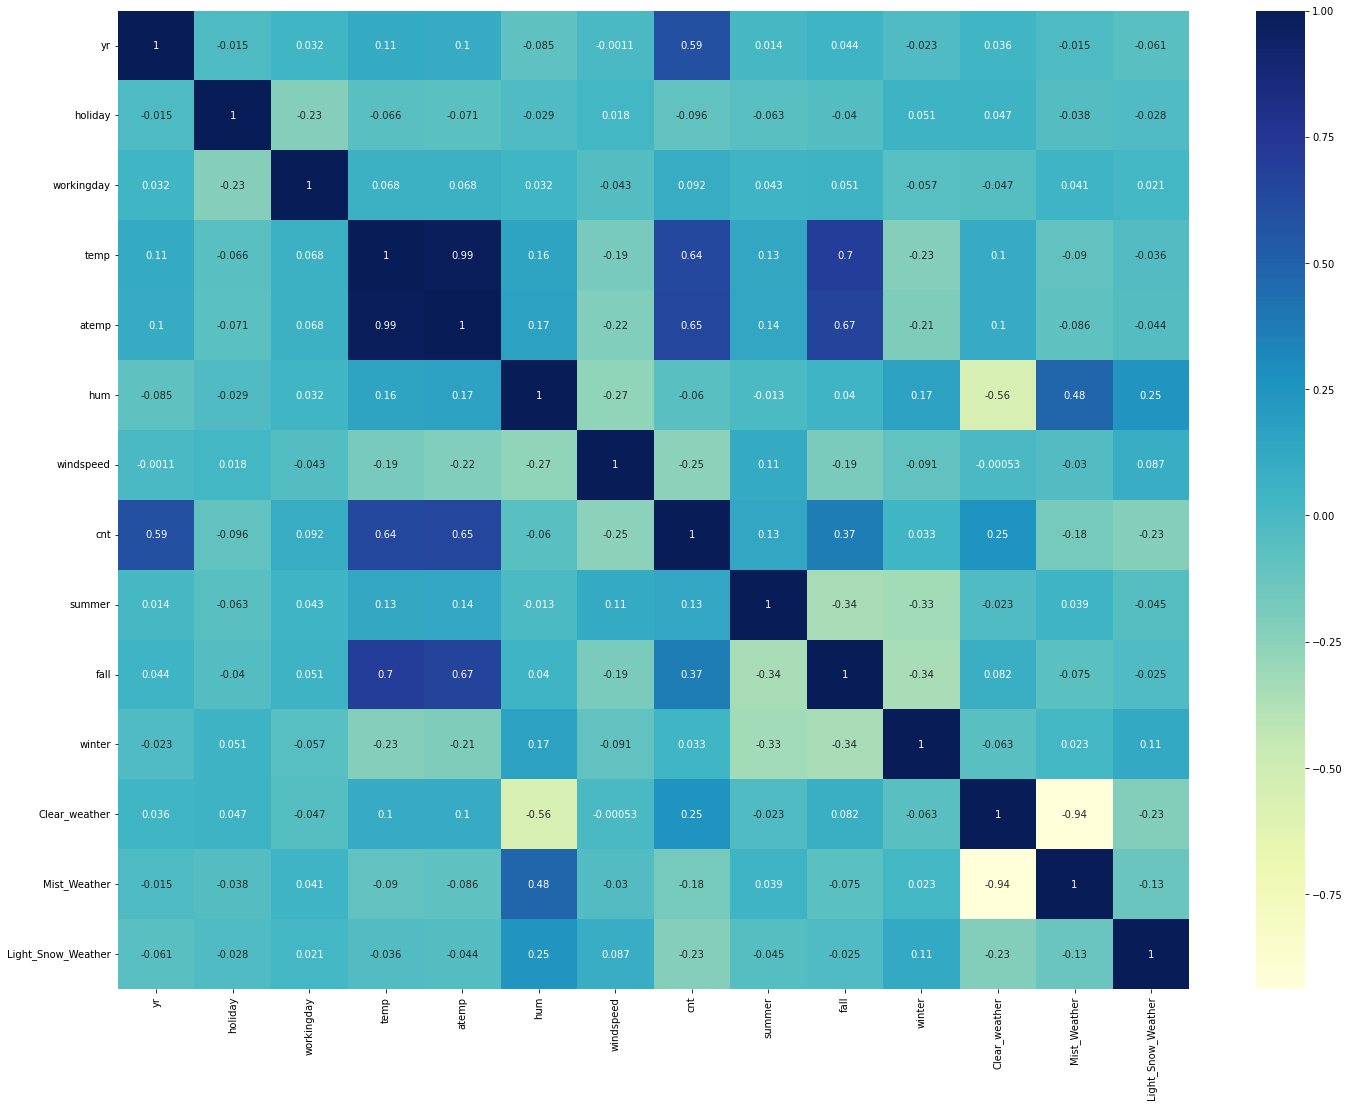

In [71]:
# let's check the correlation among features
plt.figure(figsize=(24, 18))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

# Step 4: Model Building

In [72]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model 01: Build with all features

In [73]:
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_01 = lr.fit()

# check the summary
lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.86e-181
Time:                        22:42:19   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0798      0.026      3.122      0.002       0.030       0.130
yr                     0.2303      0.008     27.174      0.000       0.214       0.247
holiday               -0.0746      0.027     -2.729      0.007      -0.128      -0.021
workingday             0.0175      0.009      1.902      0.058      -0.001       0.036
temp                   0.4645      0.141      3.306      0.001       0.188       0.741
atemp                  0.0321      0.144      0.224      0.823      -0.250       0.314
hum                   -0.1387      0.039     -3.541      0.000      -0.216      -0.062
windspeed             -0.1795      0.027     -6.556      0.000      -0.233      -0.126
summer                 0.1163      0.015      7.533      0.000       0.086       0.147
fall                   0.0749      0.021      3.593      0.000       0.034       0.116
winter                 0.1634      0.013     12.380      0.000       0.137       0.189
Clear_weather          0.1255      0.009     14.235      0.000       0.108       0.143
Mist_Weather           0.0711      0.012      6.028      0.000       0.048       0.094
Light_Snow_Weather    -0.1167      0.023     -5.109      0.000      -0.162      -0.072
==============================================================================
Omnibus:                       60.257   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.281
Skew:                          -0.577   Prob(JB):                     1.29e-36
Kurtosis:                       5.539   Cond. No.                     3.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,57.83
4,atemp,53.42
10,Clear_weather,29.72
11,Mist_Weather,22.63
8,fall,4.85
12,Light_Snow_Weather,3.45
7,summer,2.54
5,hum,1.87
9,winter,1.87
6,windspeed,1.24


## Observations
* a_temp has high p-value & VIF score

## Conclusion 
* let's rebuild the model after dropping a_temp feature

## Model 02: Rebuild the model after dropping 'a_temp'

In [75]:
X_train_02 = X_train.drop('atemp', axis=1)

In [76]:
X_train_sm = sm.add_constant(X_train_02)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_02 = lr.fit()

# check the summary
lr_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.26e-182
Time:                        22:43:01   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0800      0.026      3.132      0.002       0.030       0.130
yr                     0.2303      0.008     27.200      0.000       0.214       0.247
holiday               -0.0748      0.027     -2.743      0.006      -0.128      -0.021
workingday             0.0175      0.009      1.902      0.058      -0.001       0.036
temp                   0.4950      0.035     14.328      0.000       0.427       0.563
hum                   -0.1382      0.039     -3.538      0.000      -0.215      -0.061
windspeed             -0.1807      0.027     -6.731      0.000      -0.233      -0.128
summer                 0.1163      0.015      7.545      0.000       0.086       0.147
fall                   0.0744      0.021      3.595      0.000       0.034       0.115
winter                 0.1636      0.013     12.426      0.000       0.138       0.189
Clear_weather          0.1257      0.009     14.357      0.000       0.109       0.143
Mist_Weather           0.0712      0.012      6.055      0.000       0.048       0.094
Light_Snow_Weather    -0.1169      0.023     -5.127      0.000      -0.162      -0.072
==============================================================================
Omnibus:                       59.653   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.952
Skew:                          -0.570   Prob(JB):                     2.50e-36
Kurtosis:                       5.533   Cond. No.                     2.97e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_02.columns
vif['VIF'] = [variance_inflation_factor(X_train_02.values, i) for i in range(X_train_02.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Clear_weather,29.63
10,Mist_Weather,22.60
7,fall,4.78
3,temp,3.50
11,Light_Snow_Weather,3.45
6,summer,2.54
4,hum,1.87
8,winter,1.87
5,windspeed,1.20
1,holiday,1.07


## Observations
* Jul feature has high p-value & VIF score of more than 5

## Conclusion
* Let's rebuild the model after dropping Jul feature

# Model 03: Let's drop the Jul feature

In [78]:
X_train_03 = X_train_02.drop('Mist_Weather', axis=1)

In [79]:
X_train_sm = sm.add_constant(X_train_03)
#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_01 = lr.fit()

# check the summary
lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.26e-182
Time:                        22:44:32   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1512      0.034      4.474      0.000       0.085       0.218
yr                     0.2303      0.008     27.200      0.000       0.214       0.247
holiday               -0.0748      0.027     -2.743      0.006      -0.128      -0.021
workingday             0.0175      0.009      1.902      0.058      -0.001       0.036
temp                   0.4950      0.035     14.328      0.000       0.427       0.563
hum                   -0.1382      0.039     -3.538      0.000      -0.215      -0.061
windspeed             -0.1807      0.027     -6.731      0.000      -0.233      -0.128
summer                 0.1163      0.015      7.545      0.000       0.086       0.147
fall                   0.0744      0.021      3.595      0.000       0.034       0.115
winter                 0.1636      0.013     12.426      0.000       0.138       0.189
Clear_weather          0.0545      0.011      4.970      0.000       0.033       0.076
Light_Snow_Weather    -0.1881      0.026     -7.224      0.000      -0.239      -0.137
==============================================================================
Omnibus:                       59.653   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.952
Skew:                          -0.570   Prob(JB):                     2.50e-36
Kurtosis:                       5.533   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_03.columns
vif['VIF'] = [variance_inflation_factor(X_train_03.values, i) for i in range(X_train_03.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,23.25
4,hum,11.64
7,fall,6.49
5,windspeed,3.92
6,summer,3.36
2,workingday,3.17
9,Clear_weather,2.79
8,winter,2.49
0,yr,2.04
10,Light_Snow_Weather,1.13


## Observations
* For feature Nov, p-value is high and VIF score is near to 5

## Conclusions
* Let's rebuild the model after dropping Nov feature

# Model 04: Rebuild the model after dropping Nov

In [81]:
X_train_04 = X_train_03.drop('workingday', axis=1)

In [82]:
X_train_sm = sm.add_constant(X_train_04)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_01 = lr.fit()

# check the summary
lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.78e-183
Time:                        22:45:46   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1641      0.033      4.945      0.000       0.099       0.229
yr                     0.2307      0.008     27.186      0.000       0.214       0.247
holiday               -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp                   0.4961      0.035     14.324      0.000       0.428       0.564
hum                   -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed             -0.1827      0.027     -6.794      0.000      -0.236      -0.130
summer                 0.1168      0.015      7.554      0.000       0.086       0.147
fall                   0.0746      0.021      3.597      0.000       0.034       0.115
winter                 0.1630      0.013     12.350      0.000       0.137       0.189
Clear_weather          0.0537      0.011      4.889      0.000       0.032       0.075
Light_Snow_Weather    -0.1872      0.026     -7.171      0.000      -0.239      -0.136
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_04.columns
vif['VIF'] = [variance_inflation_factor(X_train_04.values, i) for i in range(X_train_04.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,23.22
3,hum,10.62
6,fall,6.49
4,windspeed,3.90
5,summer,3.36
8,Clear_weather,2.76
7,winter,2.49
0,yr,2.03
9,Light_Snow_Weather,1.13
1,holiday,1.04


## Observations
* Co-eff value for Dec is low and its p-value is high

## Conclusion
* Let's rebuild the model after dropping Dec feature

# Model 05: Let's rebuild the model after dropping Dec feature

In [84]:
X_train_05 = X_train_04.drop('temp', axis=1)

In [85]:
X_train_sm = sm.add_constant(X_train_05)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_01 = lr.fit()

# check the summary
lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     172.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.21e-147
Time:                        22:46:57   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -776.6
Df Residuals:                     500   BIC:                            -734.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2004      0.039      5.103      0.000       0.123       0.278
yr                     0.2468      0.010     24.730      0.000       0.227       0.266
holiday               -0.0930      0.032     -2.939      0.003      -0.155      -0.031
hum                   -0.0045      0.045     -0.101      0.920      -0.093       0.084
windspeed             -0.1765      0.032     -5.530      0.000      -0.239      -0.114
summer                 0.2545      0.014     17.718      0.000       0.226       0.283
fall                   0.3142      0.015     21.553      0.000       0.286       0.343
winter                 0.2273      0.015     15.432      0.000       0.198       0.256
Clear_weather          0.0864      0.013      6.777      0.000       0.061       0.111
Light_Snow_Weather    -0.2037      0.031     -6.581      0.000      -0.265      -0.143
==============================================================================
Omnibus:                       26.430   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.651
Skew:                          -0.291   Prob(JB):                     1.36e-12
Kurtosis:                       4.495   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_05.columns
vif['VIF'] = [variance_inflation_factor(X_train_05.values, i) for i in range(X_train_05.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,hum,6.97
3,windspeed,3.88
7,Clear_weather,2.48
5,fall,2.25
6,winter,2.19
4,summer,2.05
0,yr,1.99
8,Light_Snow_Weather,1.13
1,holiday,1.04


## Observations
* Feature Feb has low co-eff value and relative high p-value

## Conclusion
* Let's re-build the model after dropping Feb feature

# Model 06: Let's rebuild the model after dropping Feb feature

In [87]:
X_train_06 = X_train_05.drop('hum', axis=1)

In [88]:
X_train_sm = sm.add_constant(X_train_06)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_01 = lr.fit()

# check the summary
lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     194.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.64e-148
Time:                        22:47:26   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     501   BIC:                            -740.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1969      0.017     11.541      0.000       0.163       0.230
yr                     0.2469      0.010     24.845      0.000       0.227       0.266
holiday               -0.0930      0.032     -2.943      0.003      -0.155      -0.031
windspeed             -0.1755      0.030     -5.769      0.000      -0.235      -0.116
summer                 0.2543      0.014     17.875      0.000       0.226       0.282
fall                   0.3140      0.014     21.816      0.000       0.286       0.342
winter                 0.2270      0.014     15.738      0.000       0.199       0.255
Clear_weather          0.0871      0.011      8.248      0.000       0.066       0.108
Light_Snow_Weather    -0.2042      0.030     -6.697      0.000      -0.264      -0.144
==============================================================================
Omnibus:                       26.455   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.678
Skew:                          -0.291   Prob(JB):                     1.34e-12
Kurtosis:                       4.495   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:

# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_06.columns
vif['VIF'] = [variance_inflation_factor(X_train_06.values, i) for i in range(X_train_06.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,windspeed,2.89
6,Clear_weather,2.48
0,yr,1.91
3,summer,1.62
4,fall,1.59
5,winter,1.53
7,Light_Snow_Weather,1.11
1,holiday,1.04


# Step 5: Residual Analysis of the training data

In [90]:
#make prediction
y_train_pred = lr_model_01.predict(X_train_sm)

In [91]:
#let's compute residual
res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

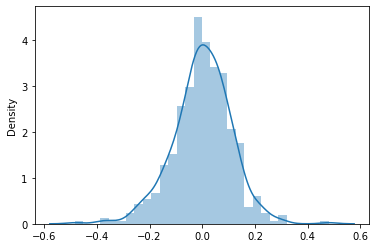

In [92]:
sns.distplot(res)

# Step 6: Prediction and evluation on the test set

In [93]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,1,0,0


In [94]:
y_test = df_test.pop('cnt')

In [95]:
X_test = df_test

In [96]:
X_test_sm = sm.add_constant(X_test)

In [98]:
X_test_sm = X_test_sm.drop(['atemp', 'Mist_Weather', 'workingday', 'temp', 'hum'], axis=1)

In [99]:
y_test_pred = lr_model_01.predict(X_test_sm)

In [104]:
r2_score(y_test, y_test_pred)

0.7367319609687298

# Step 7: Model Evaluation

Text(0, 0.5, 'y_test_pred')

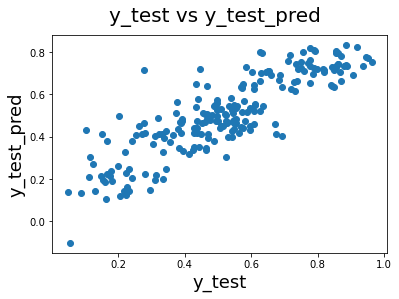

In [106]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=18)